## Dataset Creation

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
def categorize(df, ncat, column):
    bins = [0]
    q = 1/ncat
    labels = ["0"+column]
    for i in range(1, ncat):
        bins.append(df.quantile(q*i)[column])
        labels.append(str(i)+column)
    bins.append(100000000)
    df[column] = pd.cut(df[column], bins=bins, labels=labels)

In [3]:
def getDataframe(filename):
    readFile = open(filename, 'r')
    reader = csv.reader(readFile)

    data = list()  
    for row in reader:
        data.append(row)
    readFile.close()

    df = pd.DataFrame.from_dict(data)

    df.columns = df.iloc[0]
    df = df.drop(0)
    
    df["GLCM_pan"] = pd.to_numeric(df["GLCM_pan"], downcast="float")
    df["Mean_Green"] = pd.to_numeric(df["Mean_Green"], downcast="float")
    df["Mean_Red"] = pd.to_numeric(df["Mean_Red"], downcast="float")
    df["Mean_NIR"] = pd.to_numeric(df["Mean_NIR"], downcast="float")
    df["SD_pan"] = pd.to_numeric(df["GLCM_pan"], downcast="float")
    
    ncat = 4
    categorize(df, ncat, "GLCM_pan")
    categorize(df, ncat, "Mean_Green")
    categorize(df, ncat, "Mean_Red")
    categorize(df, ncat, "Mean_NIR")
    categorize(df, ncat, "SD_pan")
    
    return df

In [4]:
dfTrain = getDataframe("training.csv")
dfTest = getDataframe("testing.csv")
df = pd.concat([dfTrain,dfTest])
df = df[["GLCM_pan", "Mean_Green", "Mean_Red", "Mean_NIR", "SD_pan", "class"]]
df.head(5)

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,class
1,1GLCM_pan,0Mean_Green,3Mean_Red,0Mean_NIR,1SD_pan,w
2,1GLCM_pan,0Mean_Green,2Mean_Red,0Mean_NIR,1SD_pan,w
3,2GLCM_pan,0Mean_Green,2Mean_Red,1Mean_NIR,2SD_pan,w
4,2GLCM_pan,0Mean_Green,1Mean_Red,0Mean_NIR,2SD_pan,w
5,3GLCM_pan,0Mean_Green,2Mean_Red,2Mean_NIR,3SD_pan,w


In [5]:
df = df.sample(frac=0.5)
print(df[df['class']=='w'].shape)
print(df[df['class']=='n'].shape)
df.to_csv("dataset.csv", header=False, index=False)

(114, 6)
(2306, 6)


### Dataset Statistics

In [16]:
print("Valores Máximos:")
print(df.max())
print("Valores Mínimos:")
print(df.min())

Valores Máximos:
0
GLCM_pan      183.281
Mean_Green    1848.92
Mean_Red      1594.58
Mean_NIR      1597.33
SD_pan        183.281
class               w
dtype: object
Valores Mínimos:
0
GLCM_pan            0
Mean_Green    117.211
Mean_Red      50.5789
Mean_NIR         86.5
SD_pan              0
class               n
dtype: object


In [17]:
print("Tamanho do dataset:",df.shape)
# GLCM_pan, Mean_Green, Mean_Red, Mean_NIR, SD_pan, class

Tamanho do dataset: (4839, 6)


In [18]:
print(df[df['class']=='w'].shape)
print(df[df['class']=='n'].shape)

(261, 6)
(4578, 6)


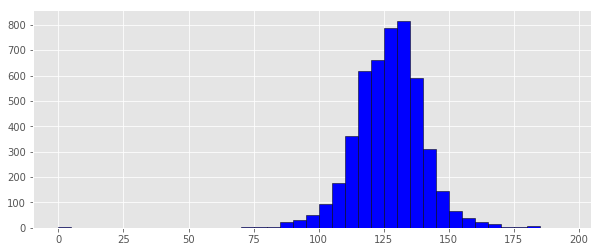

In [19]:
plt.figure(figsize=(10,4))
plt.hist(df['GLCM_pan'], bins=range(0,200,5), histtype='bar', ec='black', color='blue')
plt.show()

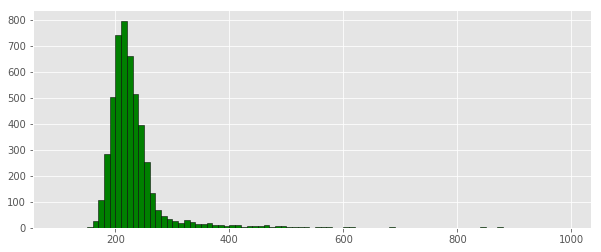

In [20]:
plt.figure(figsize=(10,4))
plt.hist(df['Mean_Green'], bins=range(100,1000,10), histtype='bar', ec='black', color='green') 
plt.show()

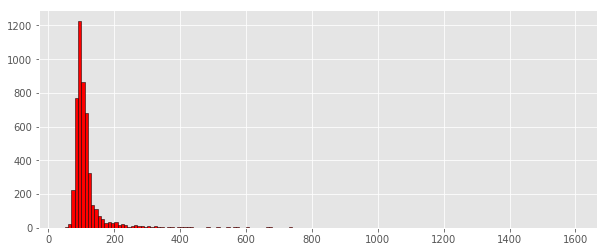

In [21]:
plt.figure(figsize=(10,4))
plt.hist(df['Mean_Red'], bins=range(50,1600,10), histtype='bar', ec='black', color='red')
plt.show()

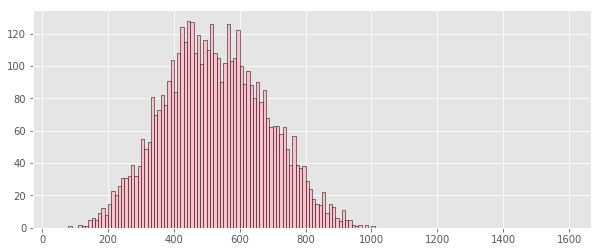

In [22]:
plt.figure(figsize=(10,4))
plt.hist(df['Mean_NIR'], bins=range(50,1600,10), histtype='bar', ec='black', color='pink')
plt.show()

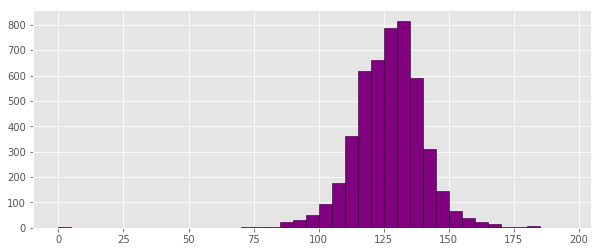

In [23]:
plt.figure(figsize=(10,4))
plt.hist(df['SD_pan'], bins=range(0,200,5), histtype='bar', ec='black', color='purple')
plt.show()